In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math

In [15]:
iris=datasets.load_iris()
X=iris.data
Y=iris.target
label_dict={0:'Setosa', 1:'Versicolor', 2:'Verginica'}

In [17]:
np.set_printoptions(precision=4)
mean_vectors=[]
for cl in range(0,3):
    mean_vectors.append(np.mean(X[Y==cl],axis=0))
    print('Mean Vector class %s: %s\n' %(cl+1,mean_vectors[cl]))

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [18]:
sw=np.zeros((4,4))
for cl,mv in zip(range(0,3),mean_vectors):
    class_sc_mat=np.zeros((4,4))
    for row in X[Y==cl]:
        row,mv=row.reshape(4,1),mv.reshape(4,1)
        class_sc_mat+=(row-mv).dot((row-mv).T)
    sw+=class_sc_mat
print(sw)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [20]:
overall_mean=np.mean(X,axis=0)
sb=np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):
    n=X[Y==i,:].shape[0]
    mean_vec=mean_vec.reshape(4,1)
    overall_mean=overall_mean.reshape(4,1)
    sb+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)
print(sb)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [21]:
eigval,eigvec=np.linalg.eig(np.linalg.inv(sw).dot(sb))
for i in range(len(eigval)):
    eigvec_sc=eigvec[:,i].reshape(4,1)
    print('\nEigenvector {}: \n{}'.format(i+1 , eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1 , eigval[i].real))


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8851]
 [-0.2946]
 [-0.2726]
 [-0.2356]]
Eigenvalue 3: 3.53e-15

Eigenvector 4: 
[[-0.8059]
 [ 0.4043]
 [ 0.4127]
 [-0.129 ]]
Eigenvalue 4: 3.17e-17


In [24]:
for i in range(len(eigval)):
    eigv=eigvec[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(sw).dot(sb).dot(eigv),eigval[i]*eigv,decimal=6,err_msg="",verbose=True)
print('OK')

OK


In [26]:
eigen_pairs=[(np.abs(eigval[i]),eigvec[:,i]) for i in range(len(eigval))]
eigen_pairs=sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print("Eigenvalues in decreasing order : \n")
for i in eigen_pairs:
    print(i[0])


Eigenvalues in decreasing order : 

32.19192919827803
0.28539104262306414
3.5296362660244315e-15
3.17116800810927e-17


In [27]:
print("Variance Explained : \n")
eig_sum=sum(eigval)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1,(j[0]/eig_sum).real))

Variance Explained : 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [28]:
w=np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix w: \n", w.real)

Matrix w: 
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


In [30]:
x_lda=X.dot(w)
assert x_lda.shape==(150,2), "The matrix is not 150x2 dimensional"

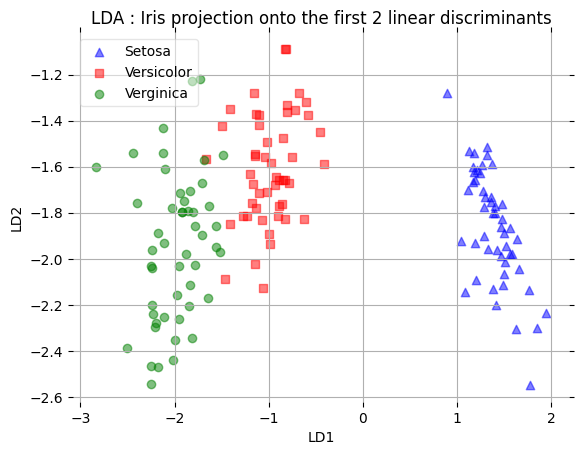

In [33]:
def plot_step_lda():
    ax=plt.subplot(111)
    for label, marker, color in zip(range(0,3),('^','s','o'),('blue','red','green')):
        plt.scatter(x=x_lda[:,0].real[Y==label],y=x_lda[:,1].real[Y==label],marker=marker,color=color,alpha=0.5,label=label_dict[label])
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    leg=plt.legend(loc='upper left', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA : Iris projection onto the first 2 linear discriminants")
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='on',left='off',right='off',labelleft='on')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()